In [200]:
import pandas as pd 
import numpy as np  
import geopandas as geo
import matplotlib.pyplot as plt
import os  
import html
import spacy  
import numpy as np
from sklearn.cluster import KMeans 
from collections import Counter
import re 
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))  
plt.style.use('dark_background')
plt.rcParams['figure.figsize']=(30,15)

In [77]:
def Encode(x): 
    try : 
        return html.unescape(x) 
    except : 
        pass 

# Lecture des données et encodage 

In [178]:
df=pd.read_csv('artist-run-spaces.csv', sep=';',encoding= "utf-8")
df.presentation = df .presentation.apply(Encode)

In [179]:
to_cluster= df[['latitude', 'longitude']]
presentation=df.presentation

In [180]:
to_cluster

,latitude,longitude
0,50.828460,4.365646
1,48.885626,2.339779
2,50.851027,4.340663
3,50.821609,4.325936
4,50.827174,4.352473
...,...,...
274,48.937383,2.342731
275,41.970616,-87.695377
276,50.710089,7.107668
277,50.829672,4.334227


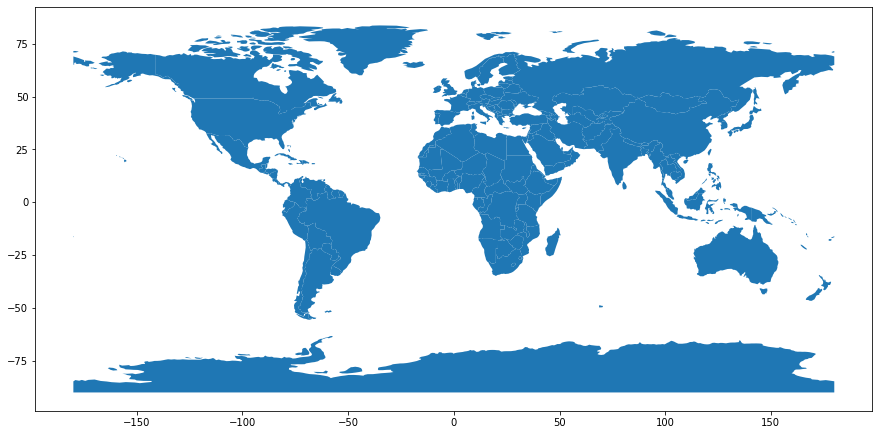

In [96]:

world.plot()

In [137]:
def Elbow(data,maxima=20): 
    distortion=[0] 
    for i in range(1,maxima): 
        Km= KMeans(n_clusters=i) 
        Km.fit(data) 
        distortion.append(Km.inertia_) 
    plt.plot(distortion)

# NLP 

In [222]:
from spacy import displacy
from spacy_langdetect import LanguageDetector 
from spacy.lang.en.stop_words import STOP_WORDS as stopen
from spacy.lang.fr.stop_words import STOP_WORDS as stopfr
nlp_fr = spacy.load('fr') 
nlp_en=spacy.load('en')    
nlp_it=spacy.load('it') 
nlp_de=spacy.load('de')
nlp_en.add_pipe(LanguageDetector(), name='language_detector', last=True) 
nlp={'fr':nlp_fr , 'en':nlp_en, 'it':nlp_it,'de':nlp_de}

In [157]:
def clean_html(x): 
    try: 
        return re.sub(r'\<[^>]*\>','', x ) 
    except: 
        pass 



def Detect_language(x): 
    try: 
        doc=nlp_en(x)  
        return doc._.language['language'] 
    except: 
        return np.nan 
     

In [193]:
df['lang']=df.presentation.apply(Detect_language)

In [194]:
df.lang.unique()

array([nan, 'fr', 'en', 'de', 'es', 'it', 'hu'], dtype=object)

In [182]:
df['presentation']=df.presentation.apply(clean_html)

In [189]:
#from spacy.lang.en import English
#from spacy.lang.fr import French
#from spacy.lang.it import Italian 
#from spacy.lang.es import Spanish 
#from spacy.lang.de import German

In [253]:
def stop_it(text,lang='fr'):

    my_doc = nlp[lang](text)

    # Create list of word tokens
    token_list = []
    for token in my_doc:
        token_list.append(token.text)


    filtered_sentence =[] 

    for word in token_list:
        lexeme = nlp[lang].vocab[word]
        if lexeme.is_stop == False:
            filtered_sentence.append(word) 
    return filtered_sentence 

In [241]:
data = df[(df.lang =='fr')|( df.lang=='en')]

In [247]:
def Tokenize_by_loc(index): 
    return stop_it(data.presentation.iloc[index],data.lang.iloc[index])

In [255]:
Tokenize_by_loc(3)

['Lieu',
 'exposition',
 'voie',
 'déplacement',
 '(',
 'LEVD',
 ')',
 'investit',
 'lieu',
 ',',
 'espace',
 'exposition',
 'temporaire',
 ',',
 'cycle',
 'expositions',
 '.',
 '\xa0',
 'association',
 'installe',
 'Lyon',
 'projet',
 'ambition',
 'mettre',
 'lumière',
 'scène',
 'artistique',
 'émergente',
 'réunissant',
 'artistes',
 'venant',
 'coins',
 'France',
 '.',
 '\xa0']

In [254]:
data

,id,nom,date_ouverture,date_fermeture,website,email,adresse,horaires,presentation,responsables,...,pays,ville,latitude,longitude,adresse_complete,codepostal,telephone,visite,user_id,lang
6,6,Le Commissariat,2006,None,www.lecommissariat.fr/,lecommissariat@gmail.com,24 rue moret,None,Le Commissariat est une structure de productio...,None,...,France,Paris,48.867430,2.379321,"24 rue moret, 75011, Paris, France",75011,None,None,1,fr
8,198,/ 77,2015,None,progetto77.tumblr.com,progettosettantasette@gmail.com,Via Plinio 43,On appointment,-English below- \n/ 77 est un collectif d'art...,"Julia Ratti, Alessandro Moroni, Colombo Nicole...",...,Italy,Milano,45.476398,9.217895,"Via Plinio 43, , Milano, Italy",None,None,None,1,fr
22,4,0gms,2008,None,www.0gms.com,contact@0gms.com,"12 Lyuben Karavelov Street, # 11",None,"0gms is an Artist-Run-Space based in Sofia, Bu...",None,...,Bulgarie,Sofia,42.686731,23.327368,"12 Lyuben Karavelov Street, # 11, 1142, Sofia,...",1142,None,None,1,en
23,87,Lieu d'exposition en voie de déplacement (LEVD),2014,None,levd.net,levd.projet@gmail.com,24 rue René Leynaud,None,Lieu d’exposition en voie de déplacement (LEVD...,Mahé de Rosière\nDimitri Kiosseff,...,France,Lyon,45.769859,4.834276,"24 rue René Leynaud, 69001, Lyon, France",69001,None,None,1,fr
24,88,mezcla,2012,None,www.espacemezcla.net,infos@espacemezcla.net,9 rue Alsace Lorraine,mardi au samedi de 14H au 18H,\nAssociation au service de la promotion et d...,"Karem Arrieta, Anais Quintero",...,France,Rouen,49.438544,1.099255,"9 rue Alsace Lorraine, 76000, ROUEN, FRANCE",76000,None,None,1,fr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274,301,6b,2010,None,www.le6b.fr,contact@le6b.fr,6 -10 quai de Seine,Lundi au jeudi de 14h30 à 18h00. Le vendredi d...,"Le 6b draine une communauté d’habitués, qui y ...","Julien Beller, Pascaline Simon, Hélène Lust et...",...,France,Saint Denis,48.937383,2.342731,"6 -10 quai de Seine, 93200, Saint Denis, France",93200,None,None,1,fr
275,302,Apparatus Projects,2018,None,www.apparatusprojects.com,gareth@apparatusprojects.com,2639 W. Ainslie Chicago,Saturdays from 1pm-4pm or by appointment,Apparatus Projects is an artist-run curatorial...,"Julian Van Der Moere, Gareth Kaye, Annie Zidek...",...,United States,Illinois,41.970616,-87.695377,"2639 W. Ainslie Chicago, , Illinois, United st...",None,None,None,1,en
276,303,DAS ESSZIMMER,2011,None,dasesszimmer.com,info@dasesszimmer.com,Mechenstrasse 25,None,DAS ESSZIMMER ( the dining room) is an artist-...,Sibylle Feucht,...,Allemagne,Bonn,50.710089,7.107668,"Mechenstrasse 25, 53129, Bonn, Allemagne",53129,None,None,1,en
277,80,Rectangle,2012,2017,www.rectangle.be,info@rectangle.be,Rue Émile Féron 189,None,"Attention, structure fonctionnant sur projets ...","Amandine Faugère, Aline Melaet, Pierre-Pol Lec...",...,Belgique,Bruxelles,50.829672,4.334227,"Rue Émile Féron 189, 1060, Bruxelles, Belgique",1060,None,None,1,fr
